# Learning Gate - Reto | Autotransporte Federal de Turismo

## Data Science Descriptive Analysis - Visualizations

### Objetivo:

Con el desarrollo del reto integrarás todos los conocimientos adquiridos, cumpliendo los siguientes objetivos:

- Realizar un análisis exploratorio de los datos para conocer su estructura y contenido.
- Visualizar información relevante en gráficas por medio del uso del comando SEABORN.
- Utilizar varios tipos de gráficos para detectar patrones, tendencias y relaciones entre los datos.



### Introducción:

El Autotransporte Federal de Turismo, se presta en los caminos de jurisdicción federal sin estar sujetos a horarios o rutas determinadas.

De conformidad a la operación del servicio y tipo de vehículos se clasifican en: 
- Automóvil. 
- Autobús.
- Camioneta.


### Importing Libraries

In [1]:
import os, glob
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sci
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

### Loading Data

In [2]:
path = os.path.join(os.getcwd(), 'Data')
files = glob.glob(os.path.join(path, '*.csv'))

df_reto1 = pd.read_csv(files[0],encoding='latin1')
df_reto2 = pd.read_csv(files[1])

### Solving Challenge

#### 3.- ***Descarga la base de datos de reto_3.csv, genera una gráfica de caja de bigotes para hallar la mediana de los autobuses que tienen las entidades***

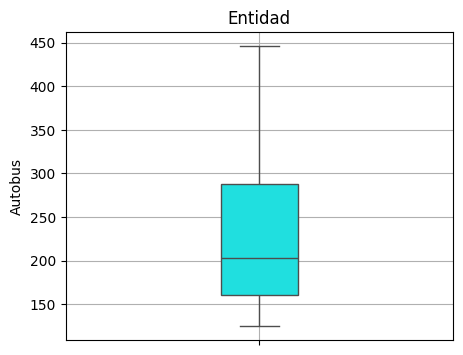

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
sns.boxplot(data=df_reto2, y="Autobus", width=.2, color='cyan', ax=ax);
ax.set_title('Entidad');
ax.set_xlabel('');
plt.grid()

#### 4.- ***Elabora una gráfica en 3 dimensiones donde relacionarás las variables Automóvil, Autobús, y camioneta***

Text(0.5, 0, 'Camioneta')

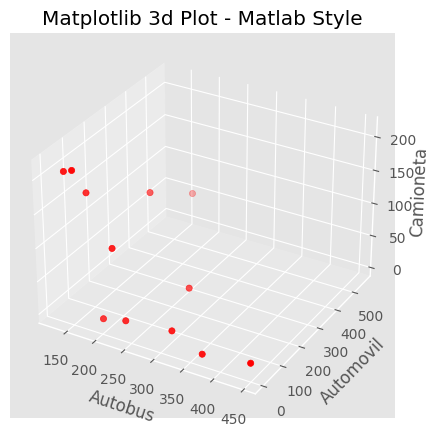

In [4]:
plt.style.use('ggplot') 
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(df_reto2.Autobus.values, df_reto2.Automovil.values, df_reto2.Camioneta.values, c="red") 
ax.zaxis.labelpad=-0.7 
ax.set_title('Matplotlib 3d Plot - Matlab Style')
ax.set_xlabel('Autobus')
ax.set_ylabel('Automovil')
ax.set_zlabel('Camioneta')

#### 5.- ***Construye una gráfica residual de las 3 variables, automóvil (variable dependiente) junto con autobús y camioneta. Las dos últimas son las variables independientes***

In [5]:
reg = LinearRegression().fit(df_reto2[df_reto2.columns[3:]].values, df_reto2[['Automovil']].values)
reg.score(df_reto2[df_reto2.columns[3:]].values, df_reto2[['Automovil']].values)

Auto_Pred = reg.predict(df_reto2[['Autobus', 'Camioneta']].values)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df_reto2.Automovil.values, Auto_Pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(df_reto2.Automovil.values, Auto_Pred))

df_reto2b = df_reto2.copy()
df_reto2b['Auto_Pred'] = Auto_Pred.T[0]

Coefficients: 
 [[-1.15973637 -1.08599402]]
Mean squared error: 20580.72
Coefficient of determination: 0.22


Text(0, 0.5, 'Error en el Ajuste')

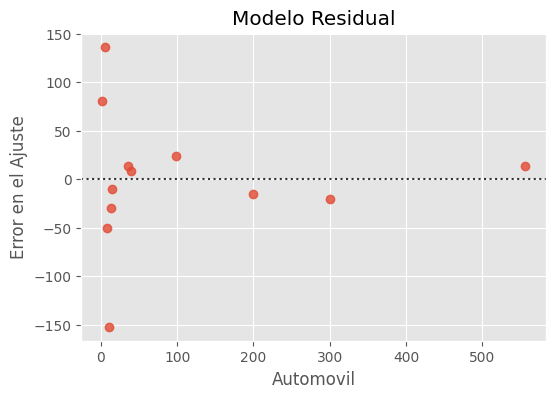

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.residplot(data=df_reto2b, x='Automovil', y='Auto_Pred');
ax.set_title('Modelo Residual')
ax.set_ylabel('Error en el Ajuste')

#### 6.- ***Indica si existe alguna relación de ajuste entre la variable automóvil y autobuses***

In [7]:
corr = np.corrcoef(df_reto2.Automovil, df_reto2.Autobus)[0,1]

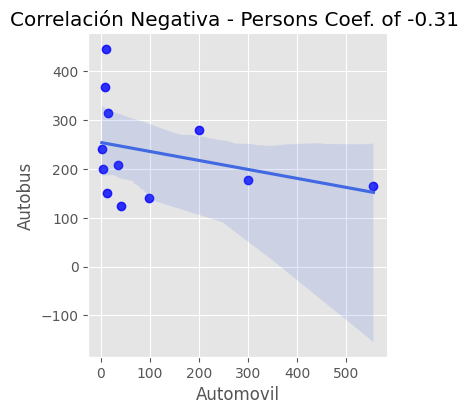

In [8]:
sns.lmplot(data = df_reto2, x = "Automovil", y = "Autobus", scatter_kws={"color": "blue"}, line_kws={"color": "royalblue"}, height=4)
plt.title('''Correlación Negativa - Persons Coef. of {0:.2f} '''.format(corr));

#### 7.- ***Realiza una gráfica de kdeplot que muestre la relación entre los automóviles y el número de autobuses de las primeras 6 entidades***

Text(0.5, 1.0, 'KDEPlot')

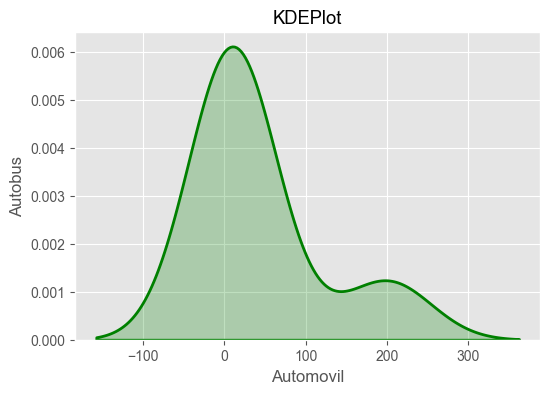

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.set(context='poster',
        style='white',
        palette='dark',
        font='sans-serif',
        font_scale=0.55, color_codes='r', rc=None) 
sns.kdeplot(data=df_reto2.iloc[0:6][['Automovil', 'Autobus']], x='Automovil', color = "Green", fill=True, ax=ax)
ax.set_ylabel('Autobus')
ax.set_title('KDEPlot')

#### 8.- ***Realiza un histograma que relacione el personal con el número de meses. Únicamente de enero a junio***

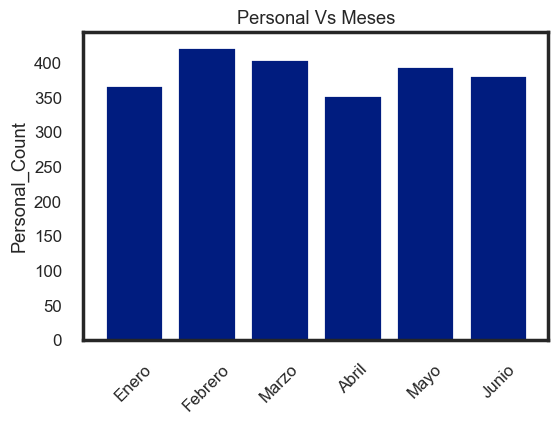

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.bar(df_reto1.loc[0:5, 'Meses'], df_reto1.loc[0:5, 'Personal ']);
ax.set_ylabel('Personal_Count');
ax.set_title('Personal Vs Meses');
plt.xticks(rotation = 45);

#### 9.- ***Realiza una gráfica de pastel que relacione los automóviles con las primeras 6 entidades de la tabla***

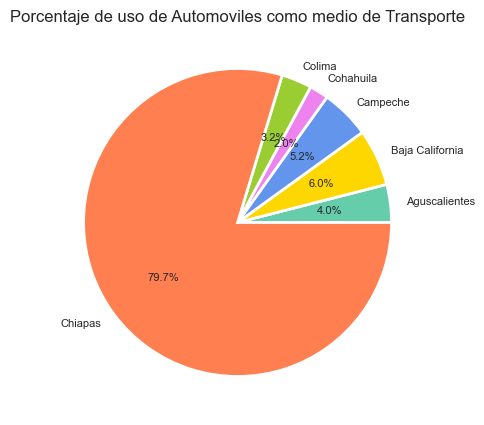

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.set_title("Porcentaje de uso de Automoviles como medio de Transporte", fontsize=12)
colors = ['mediumaquamarine', 'gold', 'cornflowerblue', 'violet', 'yellowgreen', 'coral']
labels = [col for col in df_reto2.loc[0:5, ['Entidad', 'Automovil']].Entidad.tolist()]
ax = plt.pie(df_reto2.loc[0:5, ['Automovil']].Automovil.tolist(), colors=colors, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 8});

#### 10.- ***De la base de datos obtén la gráfica de dispersión para la relación entre automóvil vs autobús e indica qué tipo de relación tienen los datos independientes***

Text(0.5, 1.0, 'Venta de helados vs Temperatura')

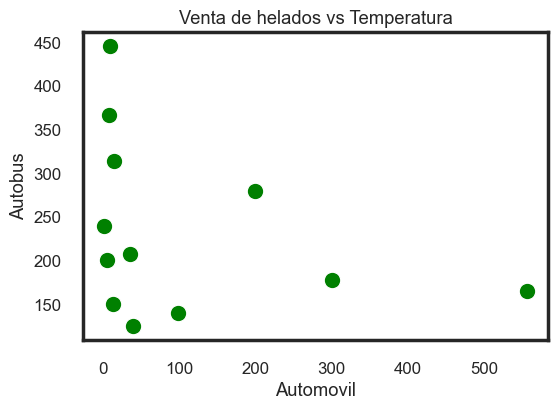

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

sns.scatterplot(data = df_reto2, x = 'Automovil', y = 'Autobus', ax=ax, color='Green')
plt.title('Venta de helados vs Temperatura')

Tiene una relacion negativa debil, ya que los datos estan muy esparcidos.

### FIN